<link rel="stylesheet" href="https://use.typekit.net/dvn1law.css">
<style>        
@font-face {
font-family:"futura-pt-bold";
src:url("https://use.typekit.net/af/053fc9/00000000000000003b9af1e4/27/l?primer=7cdcb44be4a7db8877ffa5c0007b8dd865b3bbc383831fe2ea177f62257a9191&fvd=n7&v=3") format("woff2"),url("https://use.typekit.net/af/053fc9/00000000000000003b9af1e4/27/d?primer=7cdcb44be4a7db8877ffa5c0007b8dd865b3bbc383831fe2ea177f62257a9191&fvd=n7&v=3") format("woff"),url("https://use.typekit.net/af/053fc9/00000000000000003b9af1e4/27/a?primer=7cdcb44be4a7db8877ffa5c0007b8dd865b3bbc383831fe2ea177f62257a9191&fvd=n7&v=3") format("opentype");
font-display:auto;font-style:normal;font-weight:700;font-stretch:normal;
}
</style>
<div style="display: flex; margin: 0px; padding-top: 1.5rem; padding-bottom: 1.5rem; font-family: futura-pt, 'Tahoma', 'Segoe UI', Geneva, Verdana, sans-serif;">
    <span style="margin-right: 15px; padding-right: 2rem; background-color: #3b6d48;"></span>
    <div style="margin-bottom: auto; margin-top: auto; margin-right: auto; padding-right: 15px;">
        <div style="margin: 0; padding-top: 0.2rem; padding-bottom: 3.3rem; letter-spacing: 0.15rem; color: #a6ce37; font-weight: bold; font-size: 3rem; font: futura-pt-bold"> CEOS Analytics Lab</div>
        <div style="margin: 0; color: #469ab9; font-weight: bold; font-size: 1.5rem;">Welcome to the CEOS Analytics Lab!</div>
        <div style="margin: 0; padding-bottom: 0.2rem; color: #474c38; font-size: 1.25rem;"><span>TBD</span><span>| </span><span style="color: #3b6d48; font-weight: bold;">NDWI Index</span></div>
        <hr style="border: 1px solid #474c38;">
    </div>
    <div style="margin-top: auto; margin-bottom: auto; margin-left: auto; padding-left: 15px;">
        <div><img style="vertical-align: middle; padding: 0.5rem; width: 300px; height: auto;" src="https://ceos.org/document_management/Communications/CEOS-Logos/CEOS_logo_colour_no_text-small.png" /></div>
    </div>
</div>

In [1]:
import sys, os
sys.path.append(os.path.expanduser('../../../../scripts'))
from easi_tools import notebook_utils
from datacube.utils.aws import configure_s3_access
cluster, client = notebook_utils.initialize_dask(use_gateway=False)
os.environ['USE_PYGEOS'] = '0'
configure_s3_access(aws_unsigned=False, requester_pays=True, client=client)
from easi_tools import EasiDefaults
# from easi_tools import notebook_utils

/home/jovyan/cal-notebooks/examples/ceos-notebooks/Spectral Products/spectral/../../../../scripts/easi_tools/notebook_utils.py:13: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


/env/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38321 instead
  warnings.warn(


The Normalized Difference Water Index (NDWI) is a spectral index used to assess the presence and relative abundance of water bodies or vegetation in remote sensing imagery. It measures the contrast between the near-infrared (NIR) and green portions of the electromagnetic spectrum.  

Normalized Difference Water Index (NDWI) may refer to one of at least two remote sensing-derived indexes related to liquid water:

## Formula     
    
**Vegetation**:   

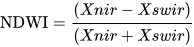

Used to monitor changes in water content of leaves, using near-infrared (NIR) and short-wave infrared (SWIR) wavelengths:
  
    
**Water Content**:  
  
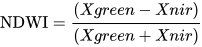

Used to monitor changes related to water content in water bodies, using green and NIR wavelengths



### NDWI is particularly useful for various applications, including:

-  Water body mapping: NDWI can help identify and delineate surface water bodies such as lakes, rivers, reservoirs, and ponds in remote sensing imagery. By setting a suitable threshold, water bodies can be extracted from other land cover classes.

- Wetland monitoring: Wetlands play a crucial role in ecosystems and hydrological processes. NDWI helps detect and monitor wetland areas, which is essential for conservation and understanding changes in these sensitive environments.

- Vegetation analysis: NDWI can provide insights into vegetation health and vigor. High NDWI values often correspond to dense vegetation cover, indicating areas with healthy and thriving vegetation. This information is useful for agricultural applications, forestry assessments, and monitoring ecosystem dynamics.

- Drought monitoring: NDWI can be used to assess the impact of drought conditions on vegetation. As water becomes limited, the NDWI values decrease, indicating stress and reduced vegetation activity.


  

### References:
- None Available

### Definition

In [28]:
def NDWI_vegetation(data, normalize=False, band_pair=0):
    """
    Computes the Normalized Difference Water Index for an `xarray.Dataset`.
    The range is [-1,1] if `not normalize`, and [0,1] otherwise.
    """
    return (data.nir - data.swir1) / (data.nir + data.swir1)

In [29]:
def NDWI_water(data, normalize=False, band_pair=0):
    """
    Computes the Normalized Difference Water Index for an `xarray.Dataset`.
    The range is [-1,1] if `not normalize`, and [0,1] otherwise.
    """
    return (data.green - data.nir) / (data.green + data.nir)

# Invocation of the Index

#### Load Data

In [25]:
import datacube
dc = datacube.Datacube(app = "NDWI")

landsat_dataset = dc.load(latitude =(37.02, 37.12) ,
                          longitude =  (-76.55, -76.34) ,
                          time = ('2015-1-1', '2015-12-31'),
                          product = "landsat8_c2l2_sr",
                          measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'pixel_qa'],
                          output_crs = 'EPSG:6933',
                          resolution = (-30,30),
                        dask_chunks = {'time':1}
                         ) 

#### Create Composite

In [14]:
def median_composite(dataset, clean_mask):
    cleaned_dataset = dataset.where(clean_mask)
    composite = cleaned_dataset.median('time', skipna=True)
    return composite

In [15]:
from landsat_utils import landsat_qa_clean_mask

cloud_mask             = landsat_qa_clean_mask(landsat_dataset,
                                               platform="LANDSAT_8", 
                                               collection="c2",
                                               level="l2")

land_mask =  landsat_qa_clean_mask(landsat_dataset,
                                                platform="LANDSAT_8", 
                                                collection="c2",
                                                level="l2",
                                                cover_types=['clear'])

land_and_water_dataset = landsat_dataset.where(cloud_mask)
land_dataset = landsat_dataset.where(land_mask)

land_and_water_composite =   median_composite(land_and_water_dataset, cloud_mask).persist()
land_composite = median_composite(land_dataset, land_mask).persist()



### Plot Composite

In [8]:
import numpy as np
rgb_arr = np.dstack([land_and_water_composite.red.values,land_and_water_composite.green.values,land_and_water_composite.blue.values])

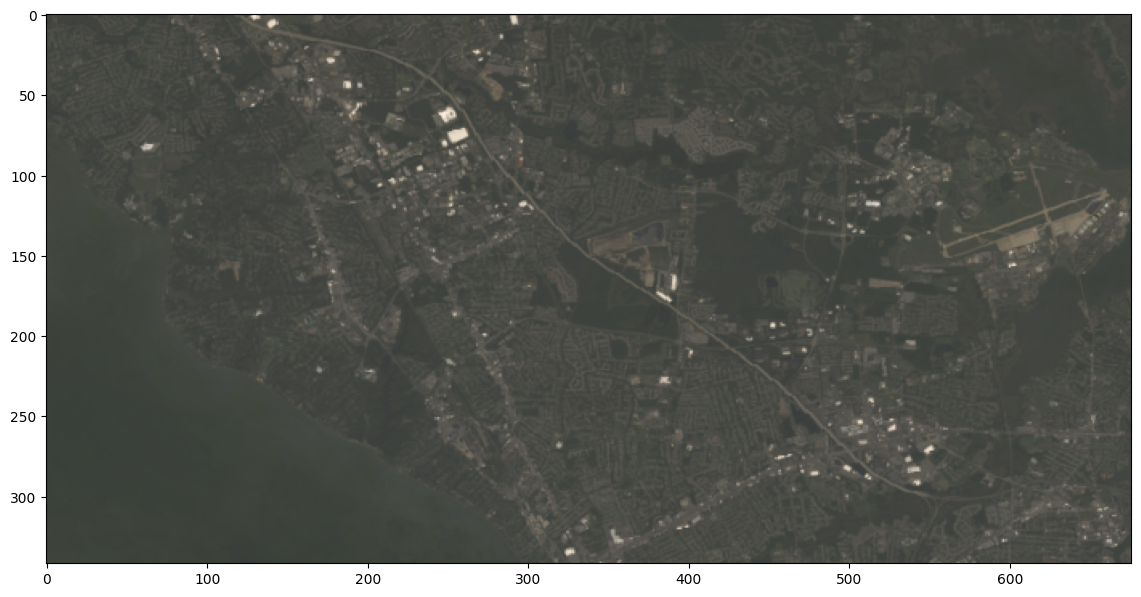

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 8))
plt.imshow(rgb_arr/rgb_arr.max())

### Run Vegetation NDWI on Composite

In [32]:
ds_NDWI_vegetation = NDWI_vegetation(land_and_water_composite)

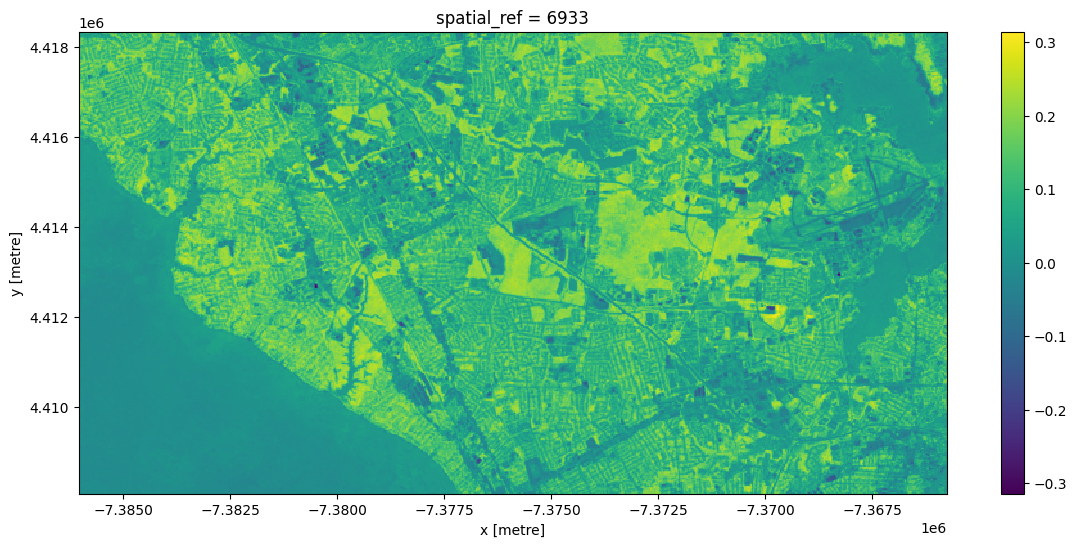

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 6))

ds_NDWI_vegetation.plot(cmap = "viridis")

### Run Water NDWI on Composite

In [34]:
ds_NDWI_water = NDWI_water(land_and_water_composite)

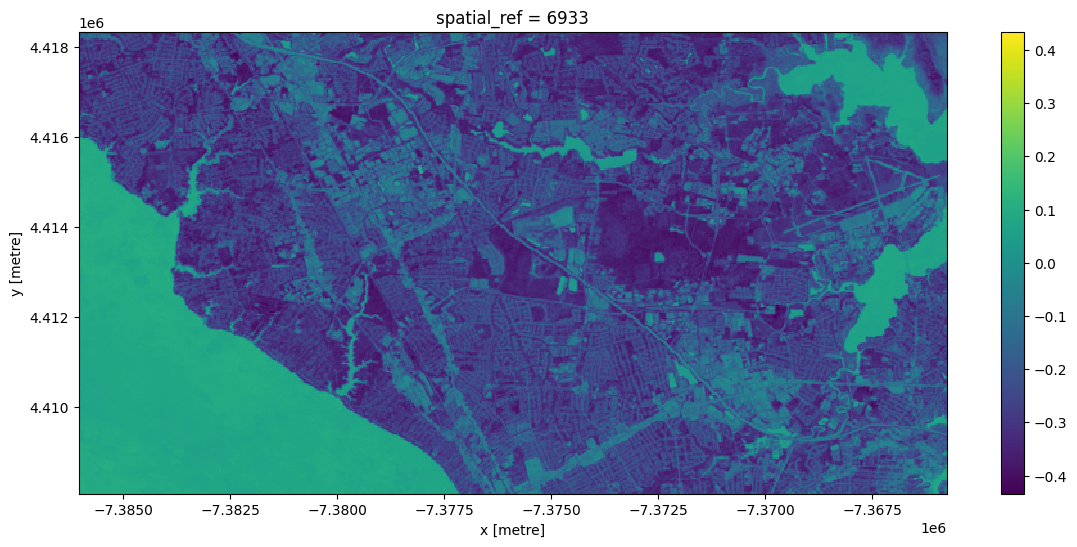

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 6))

ds_NDWI_water.plot(cmap = "viridis")

NDWI values range from -1 to 1, with higher values indicating a higher likelihood of water presence or dense vegetation. Here's how to interpret NDWI values:

- Values close to 1: These values typically indicate the presence of water. This is because water strongly absorbs green light and reflects near-infrared light, resulting in a higher NIR value relative to green. Thus, a high NDWI value signifies a strong contrast between the two bands, indicating the presence of water bodies.

- Values close to 0: These values suggest minimal to no water presence or sparse vegetation. When the NIR and green reflectances are similar or equal, the NDWI value tends to approach zero. This scenario is common in arid or non-vegetated areas.

- Values below 0: These values indicate the absence of water or non-vegetated surfaces. In such cases, the green reflectance may exceed the NIR reflectance, resulting in a negative NDWI value.

